In [0]:
# Importing Libraries

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Creating Spark Object
spark = SparkSession.builder.appName("Data Exploration").getOrCreate()

In [0]:
# Loading The Data

df = spark.read.format("delta").load("/dbfs/FileStore/Heart Disease/heart_cleaned")

In [0]:
# Convert to Pandas DataFrame
df = df.toPandas()

# Preview
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage
0,1,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0


In [0]:
# Check For Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int32  
 1   age       920 non-null    int32  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    int32  
 6   chol      920 non-null    int32  
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    int32  
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    int32  
 14  thal      920 non-null    object 
 15  stage     920 non-null    int32  
dtypes: bool(2), float64(1), int32(7), object(6)
memory usage: 77.4+ KB


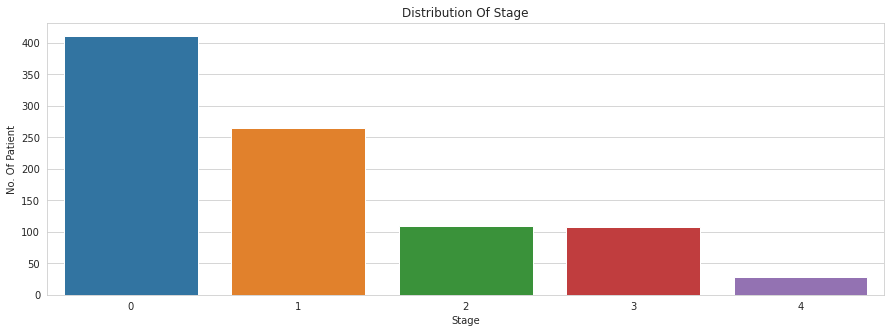

In [0]:
# Distribution Of Stage
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.countplot(x="stage",data = df)
plt.title("Distribution Of Stage")
plt.xlabel("Stage")
plt.ylabel("No. Of Patient")
plt.show()

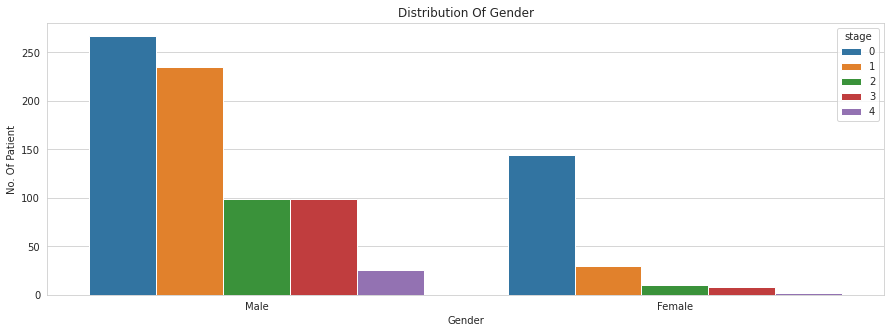

In [0]:
# Distribution Of Patient By Gender
plt.figure(figsize=(15, 5))
sns.countplot(x="sex",hue="stage",data = df)
plt.title("Distribution Of Gender")
plt.xlabel("Gender")
plt.ylabel("No. Of Patient")
plt.show()

Out[57]: <AxesSubplot:xlabel='age', ylabel='Count'>

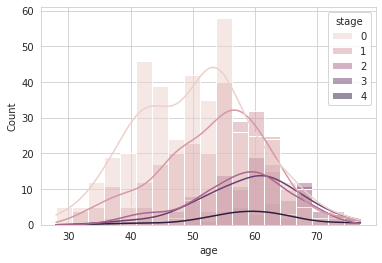

In [0]:
# Distribution Of Age By Stage
sns.histplot(data=df, x='age', hue='stage', kde=True)
 

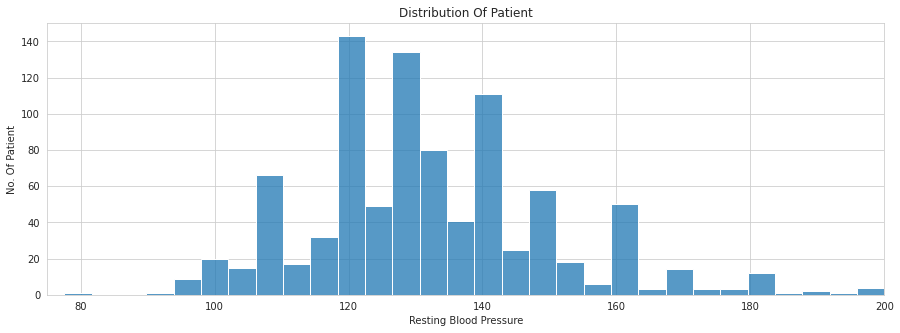

In [0]:
# Distribution Of trestbps
plt.figure(figsize=(15, 5))
sns.histplot(x="trestbps",data = df)
plt.xlim((75,200))
plt.title("Distribution Of Patient")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("No. Of Patient")
plt.show()

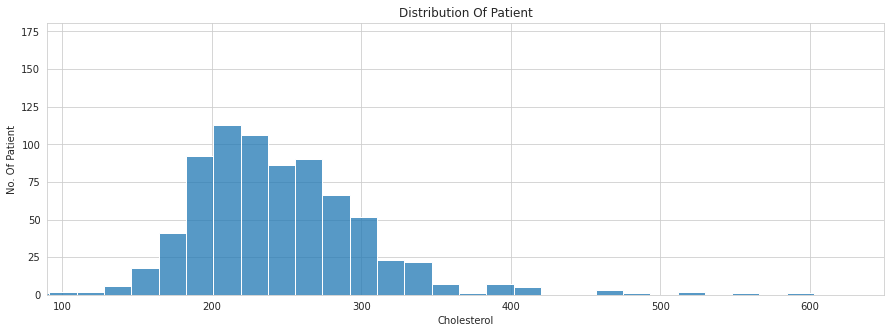

In [0]:
# Distribution Of chol
plt.figure(figsize=(15, 5))
plt.xlim((90,650))
sns.histplot(x="chol",data = df)
plt.title("Distribution Of Patient")
plt.xlabel("Cholesterol")
plt.ylabel("No. Of Patient")
plt.show()

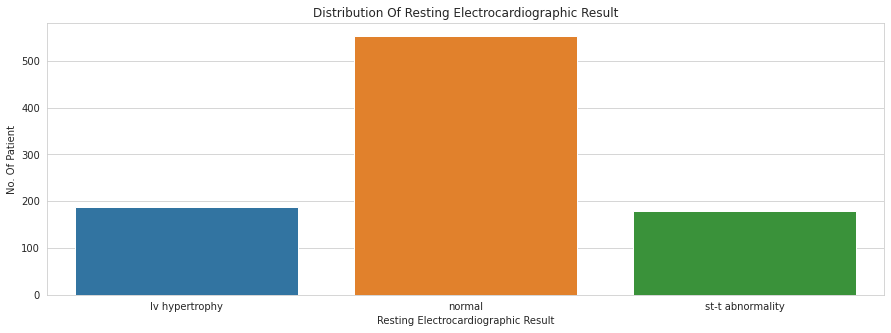

In [0]:
# Distribution Of restecg
plt.figure(figsize=(15, 5))
sns.countplot(x="restecg",data = df)
plt.title("Distribution Of Resting Electrocardiographic Result")
plt.xlabel("Resting Electrocardiographic Result")
plt.ylabel("No. Of Patient")
plt.show()

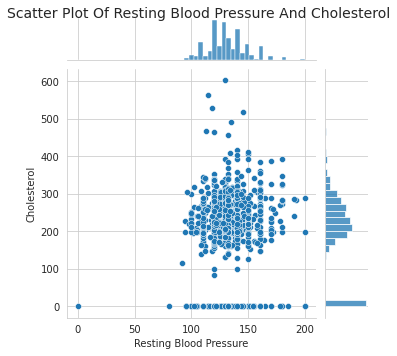

In [0]:
# Create jointplot and store the object
g = sns.jointplot(
    x="trestbps",
    y="chol",
    data=df,
    height=5,     # Controls overall figure size (in inches)
    space=0.2,    # Space between the joint and marginal plots
    kind="scatter"
)

# Set the main title
g.fig.suptitle("Scatter Plot Of Resting Blood Pressure And Cholesterol", fontsize=14)

# Adjust the title position
g.fig.subplots_adjust(top=0.95)

# Set axis labels
g.set_axis_labels("Resting Blood Pressure", "Cholesterol")

plt.show()


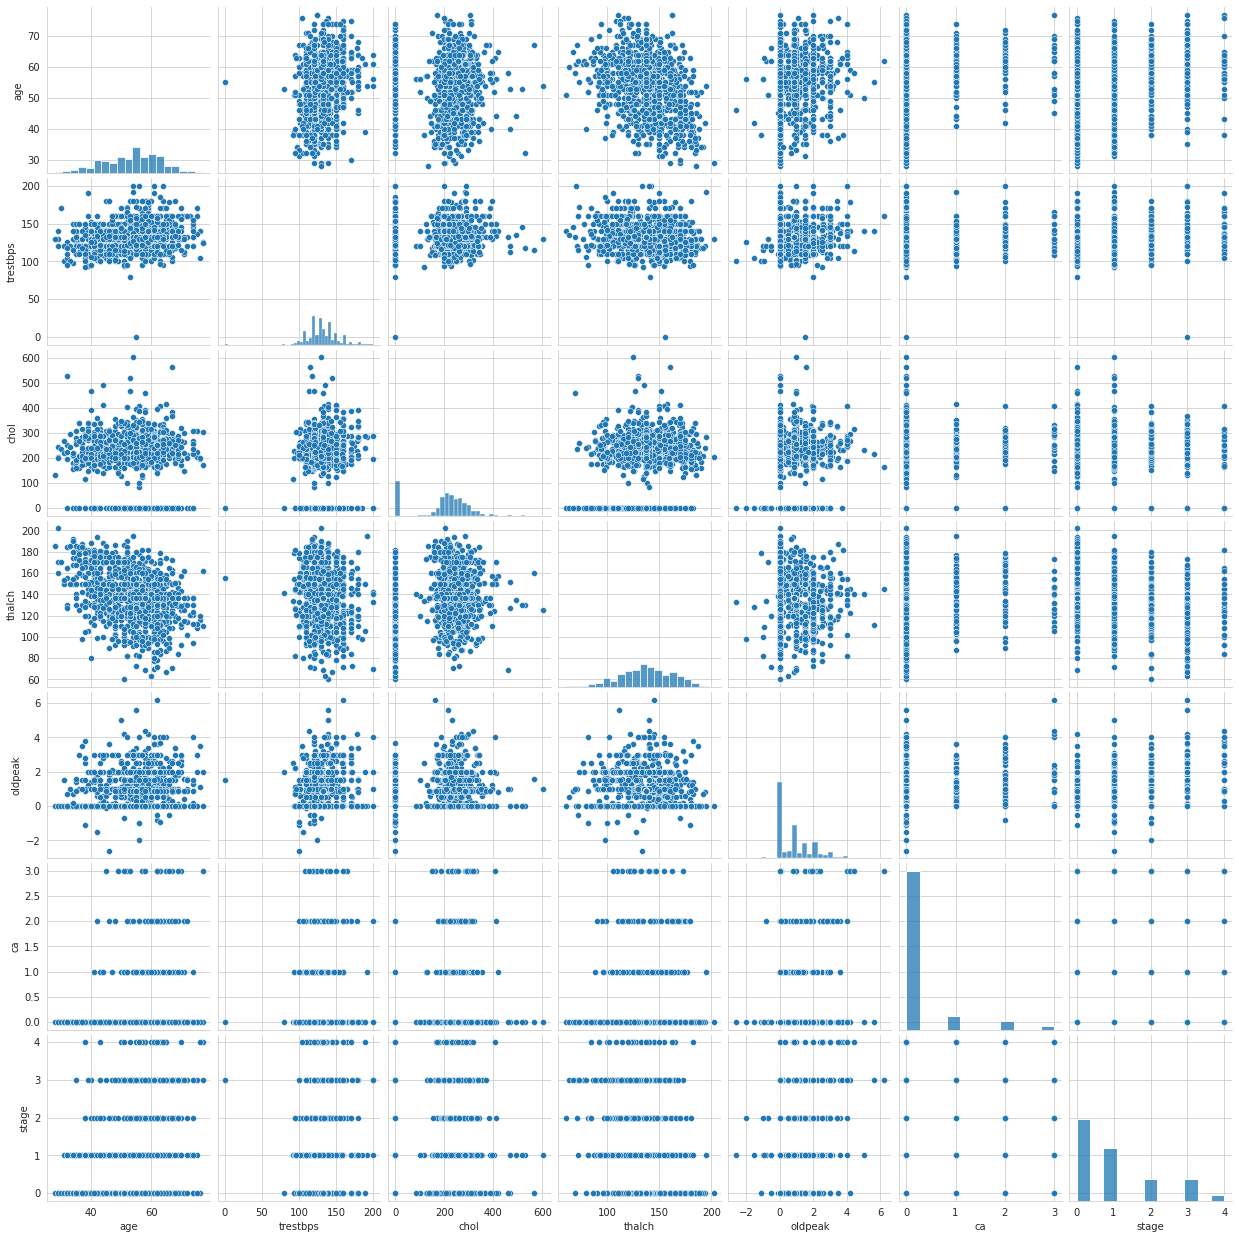

In [0]:
# Distribution Of All Variable Of DataFrame
# Select only numeric columns
subset = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca', 'stage']
sns.pairplot(df[subset])
plt.show()

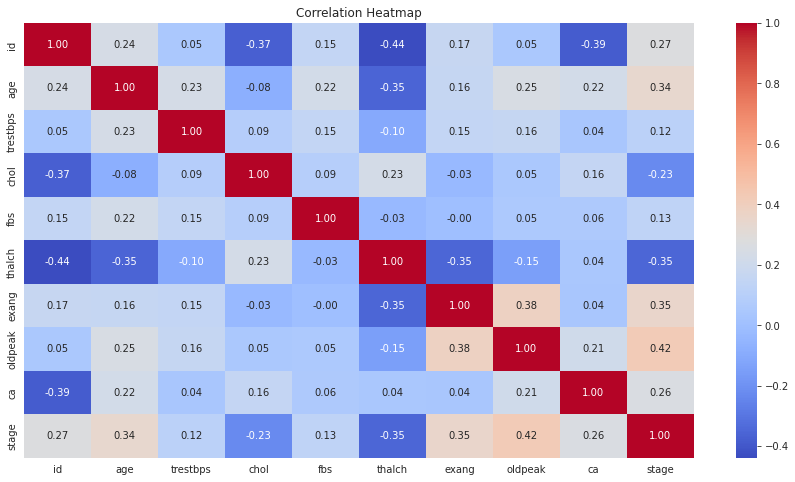

In [0]:
# Correlation Matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()